<a href="https://colab.research.google.com/github/kinyuadennis/EPL-Data-analysis/blob/main/EPL_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [16]:
df_premier25=pd.read_html("https://www.espn.com/soccer/standings/_/league/ENG.1/season/2024")
print(df_premier25)

[                       2024-2025
0                  1LIVLiverpool
1                    2ARSArsenal
2            3MNCManchester City
3                    4CHEChelsea
4           5NEWNewcastle United
5                6AVLAston Villa
6          7NFONottingham Forest
7     8BHABrighton & Hove Albion
8            9BOUAFC Bournemouth
9                 10BREBrentford
10                   11FULFulham
11           12CRYCrystal Palace
12                  13EVEEverton
13          14WHUWest Ham United
14        15MANManchester United
15  16WOLWolverhampton Wanderers
16        17TOTTottenham Hotspur
17           18LEILeicester City
18             19IPSIpswich Town
19              20SOUSouthampton,     GP   W   D   L   F   A  GD   P
0   38  25   9   4  86  41  45  84
1   38  20  14   4  69  34  35  74
2   38  21   8   9  72  44  28  71
3   38  20   9   9  64  43  21  69
4   38  20   6  12  68  47  21  66
5   38  19   9  10  58  51   7  66
6   38  19   8  11  58  46  12  65
7   38  16  13   9  66  5

In [18]:
# Assuming the tables are in a list called 'df_premier25' as per your output
teams_df = df_premier25[0]
standings_df = df_premier25[1]

# Clean up the team names column
# It seems the team name column has the position number and team name combined.
# We can use a regular expression to extract just the team name.
teams_df['Team'] = teams_df.iloc[:, 0].str.extract(r'\d+(.*)')

# Drop the original combined column and rename the new column
teams_df = teams_df[['Team']]

# Now, let's attempt to combine them. A simple concatenation might work if the rows align.
# A more robust approach might involve merging on a common key if available, or by index after ensuring they have the same number of rows.
# For this example, let's try concatenating assuming the rows match. We'll reset index to avoid potential issues.
teams_df = teams_df.reset_index(drop=True)
standings_df = standings_df.reset_index(drop=True)

# Simple concatenation
combined_df = pd.concat([teams_df, standings_df], axis=1)

# Rename columns for clarity based on the output provided by the user
combined_df.rename(columns={'GP':'Games_Played', 'W':'Wins','D':'Draws','L':'Lost','F':'Goals_For',
                             'A':'Goals_Against','GD':'Goal_Difference','P':'Points'},inplace=True)


display(combined_df.head())

,Team,Games_Played,Wins,Draws,Lost,Goals_For,Goals_Against,Goal_Difference,Points
0,LIVLiverpool,38,25,9,4,86,41,45,84
1,ARSArsenal,38,20,14,4,69,34,35,74
2,MNCManchester City,38,21,8,9,72,44,28,71
3,CHEChelsea,38,20,9,9,64,43,21,69
4,NEWNewcastle United,38,20,6,12,68,47,21,66


In [21]:
attack_score = combined_df['Goals_For'] / combined_df['Games_Played']
defense_score = combined_df['Goals_Against'] / combined_df['Games_Played'] # Lower is better
draw_rate = combined_df['Draws'] / combined_df['Games_Played']
loss_rate = combined_df['Lost'] / combined_df['Games_Played']

# You can then add these as new columns to your DataFrame if you like:
combined_df['Attack_Score'] = attack_score
combined_df['Defense_Score'] = defense_score
combined_df['Draw_Rate'] = draw_rate
combined_df['Loss_Rate'] = loss_rate

display(combined_df.head())

,Team,Games_Played,Wins,Draws,Lost,Goals_For,Goals_Against,Goal_Difference,Points,Attack_Score,Defense_Score,Draw_Rate,Loss_Rate
0,LIVLiverpool,38,25,9,4,86,41,45,84,2.263158,1.078947,0.236842,0.105263
1,ARSArsenal,38,20,14,4,69,34,35,74,1.815789,0.894737,0.368421,0.105263
2,MNCManchester City,38,21,8,9,72,44,28,71,1.894737,1.157895,0.210526,0.236842
3,CHEChelsea,38,20,9,9,64,43,21,69,1.684211,1.131579,0.236842,0.236842
4,NEWNewcastle United,38,20,6,12,68,47,21,66,1.789474,1.236842,0.157895,0.315789


from matplotlib import pyplot as plt
_df_0['Wins'].plot(kind='hist', bins=20, title='Wins')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Draws'].plot(kind='hist', bins=20, title='Draws')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Lost'].plot(kind='hist', bins=20, title='Lost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Goals_For'].plot(kind='hist', bins=20, title='Goals_For')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Team').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Wins', y='Draws', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Draws', y='Lost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Lost', y='Goals_For', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Goals_For', y='Goals_Against', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Games_Played']
  ys = series['Wins']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Games_Played', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Games_Played')
_ = plt.ylabel('Wins')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Games_Played']
  ys = series['Draws']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Games_Played', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Games_Played')
_ = plt.ylabel('Draws')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Games_Played']
  ys = series['Goals_For']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Games_Played', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Games_Played')
_ = plt.ylabel('Goals_For')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Games_Played']
  ys = series['Goals_Against']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Games_Played', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Games_Played')
_ = plt.ylabel('Goals_Against')

from matplotlib import pyplot as plt
_df_13['Wins'].plot(kind='line', figsize=(8, 4), title='Wins')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Draws'].plot(kind='line', figsize=(8, 4), title='Draws')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Lost'].plot(kind='line', figsize=(8, 4), title='Lost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Goals_For'].plot(kind='line', figsize=(8, 4), title='Goals_For')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Wins', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Draws', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Lost', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Goals_For', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

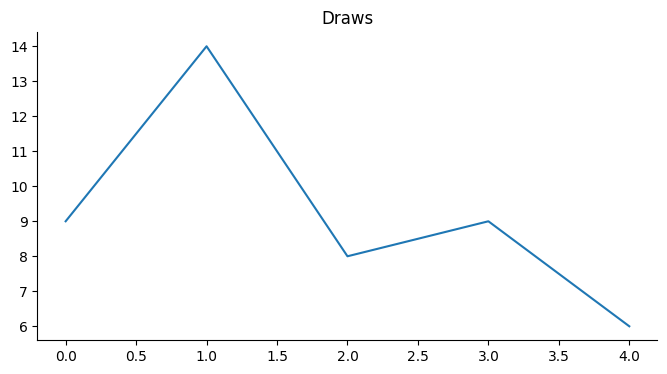

In [25]:
from matplotlib import pyplot as plt
_df_14['Draws'].plot(kind='line', figsize=(8, 4), title='Draws')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-24-1973496375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_18, x='Draws', y='Team', inner='stick', palette='Dark2')


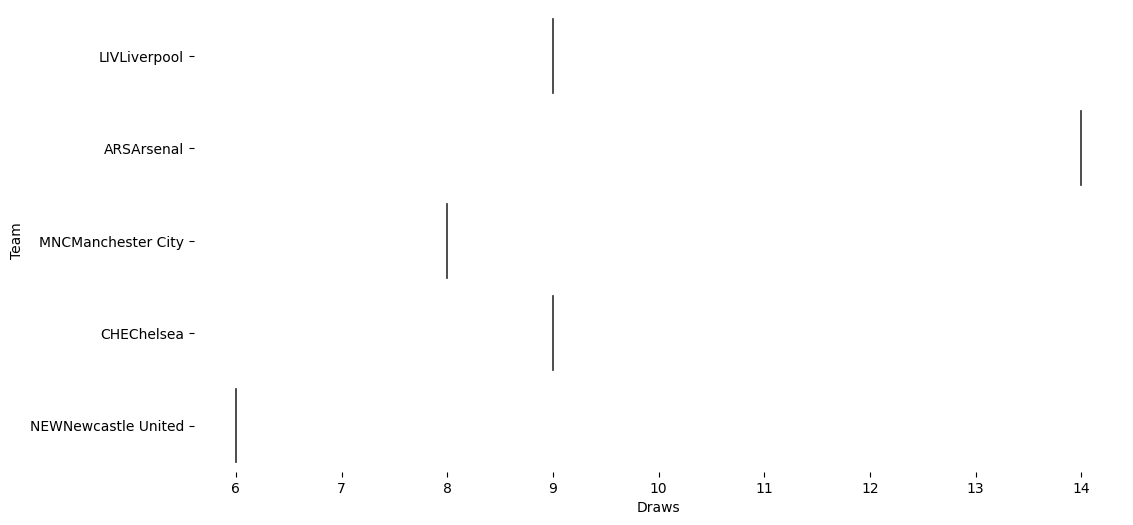

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Draws', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

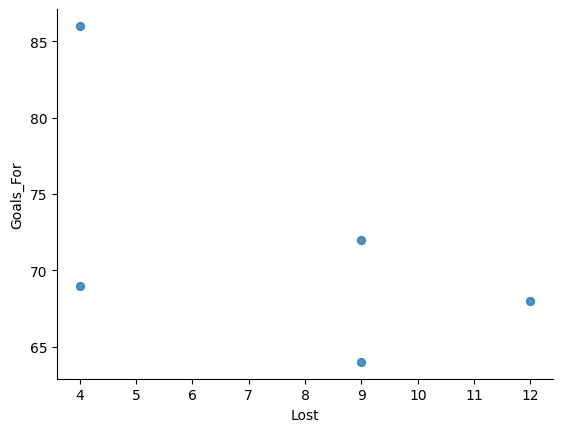

In [23]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Lost', y='Goals_For', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

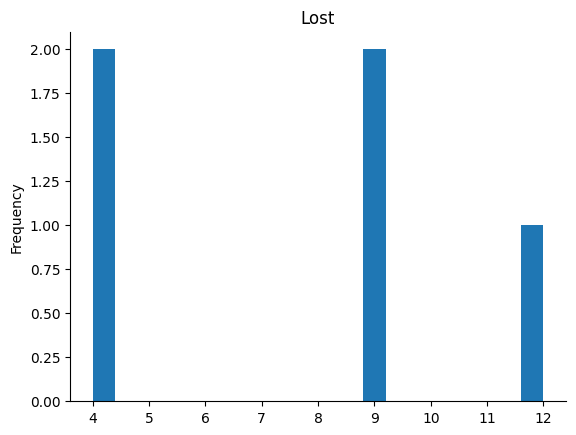

In [22]:
from matplotlib import pyplot as plt
_df_2['Lost'].plot(kind='hist', bins=20, title='Lost')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
# Categorize teams based on their attack and defense scores relative to the league average
def categorize_team(row):
    if row['Attack_Score'] > league_avg_attack and row['Defense_Score'] < league_avg_defense:
        return "Well Balanced"
    elif row['Attack_Score'] > league_avg_attack:
        return "Strong Attack"
    elif row['Defense_Score'] < league_avg_defense:
        return "Strong Defense"
    else:
        return "Weak Overall"

combined_df['Team_Category'] = combined_df.apply(categorize_team, axis=1)

display(combined_df[['Team', 'Attack_Score', 'Defense_Score', 'Team_Category']])

,Team,Attack_Score,Defense_Score,Team_Category
0,LIVLiverpool,2.263158,1.078947,Well Balanced
1,ARSArsenal,1.815789,0.894737,Well Balanced
2,MNCManchester City,1.894737,1.157895,Well Balanced
3,CHEChelsea,1.684211,1.131579,Well Balanced
4,NEWNewcastle United,1.789474,1.236842,Well Balanced
5,AVLAston Villa,1.526316,1.342105,Well Balanced
6,NFONottingham Forest,1.526316,1.210526,Well Balanced
7,BHABrighton & Hove Albion,1.736842,1.552632,Strong Attack
8,BOUAFC Bournemouth,1.526316,1.210526,Well Balanced
9,BREBrentford,1.736842,1.500000,Strong Attack


from matplotlib import pyplot as plt
_df_29['Attack_Score'].plot(kind='hist', bins=20, title='Attack_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Defense_Score'].plot(kind='hist', bins=20, title='Defense_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('Team_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='Attack_Score', y='Defense_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Attack_Score'].plot(kind='line', figsize=(8, 4), title='Attack_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Defense_Score'].plot(kind='line', figsize=(8, 4), title='Defense_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['Team_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='Attack_Score', y='Team_Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['Team_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='Defense_Score', y='Team_Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

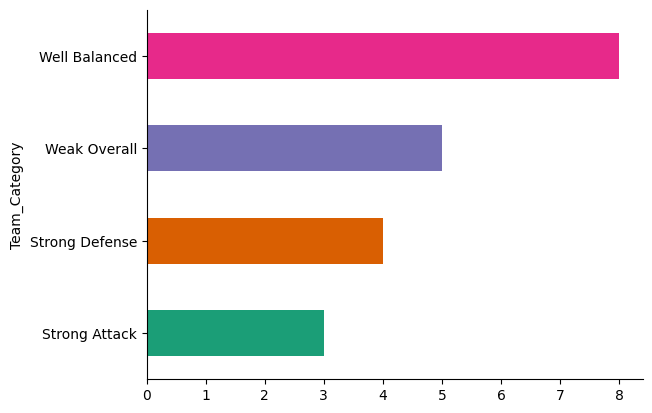

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('Team_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-32-2489555266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_27, x='Attack_Score', y='Team_Category', inner='stick', palette='Dark2')


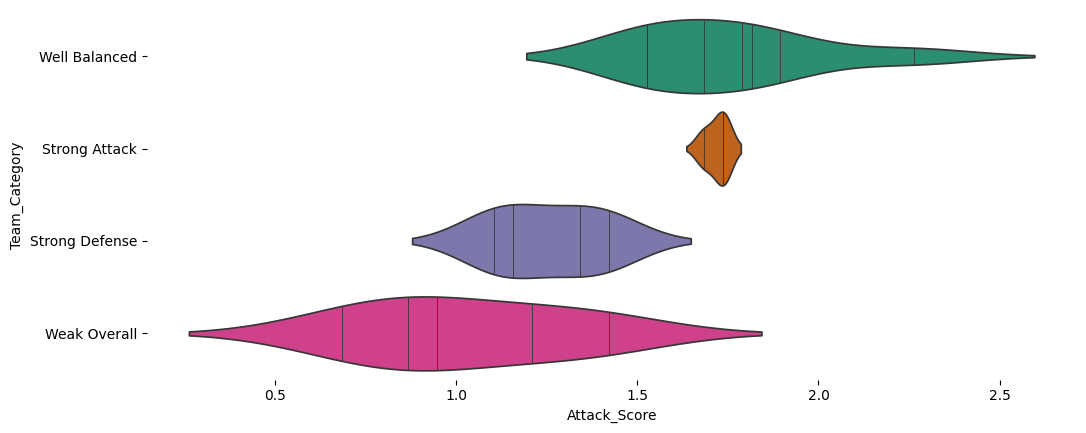

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Team_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Attack_Score', y='Team_Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

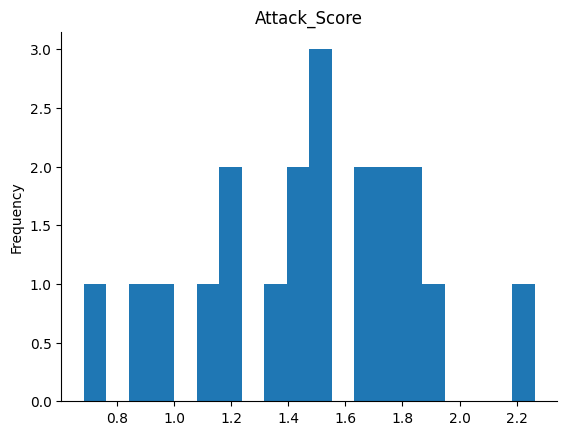

In [31]:
from matplotlib import pyplot as plt
_df_21['Attack_Score'].plot(kind='hist', bins=20, title='Attack_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
# Calculate the league average for attack and defense scores
league_avg_attack = combined_df['Attack_Score'].mean()
league_avg_defense = combined_df['Defense_Score'].mean()

print(f"League Average Attack Score: {league_avg_attack:.2f}")
print(f"League Average Defense Score: {league_avg_defense:.2f}")

League Average Attack Score: 1.47
League Average Defense Score: 1.47


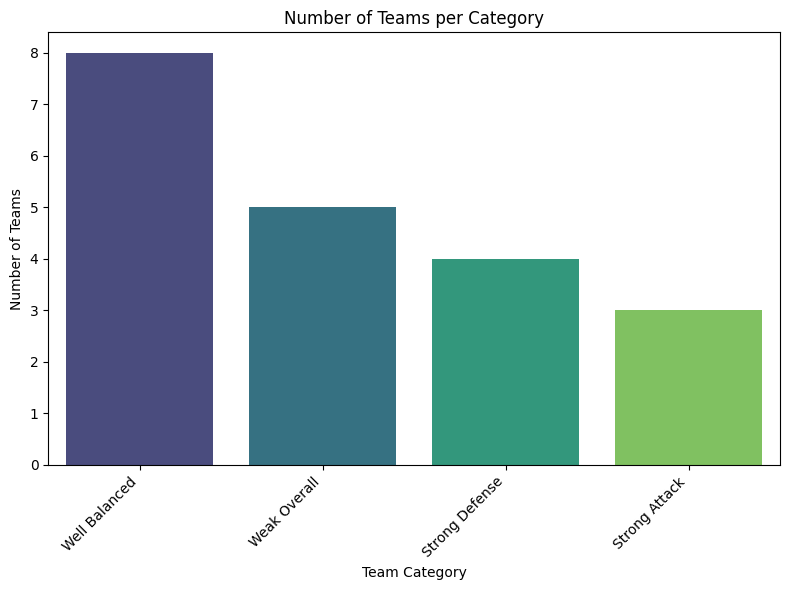

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

# Count the number of teams in each category
category_counts = combined_df['Team_Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of Teams per Category')
plt.xlabel('Team Category')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [46]:
from sklearn.cluster import KMeans
import pandas as pd

features = combined_df[['Attack_Score', 'Defense_Score']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added random_state and n_init for reproducibility and to avoid warnings
combined_df['KMeans_Team_Type'] = kmeans.fit_predict(features)

display(combined_df[['Team', 'Attack_Score', 'Defense_Score', 'KMeans_Team_Type']])

,Team,Attack_Score,Defense_Score,KMeans_Team_Type
0,LIVLiverpool,2.263158,1.078947,2
1,ARSArsenal,1.815789,0.894737,2
2,MNCManchester City,1.894737,1.157895,2
3,CHEChelsea,1.684211,1.131579,2
4,NEWNewcastle United,1.789474,1.236842,2
5,AVLAston Villa,1.526316,1.342105,0
6,NFONottingham Forest,1.526316,1.210526,0
7,BHABrighton & Hove Albion,1.736842,1.552632,0
8,BOUAFC Bournemouth,1.526316,1.210526,0
9,BREBrentford,1.736842,1.500000,0


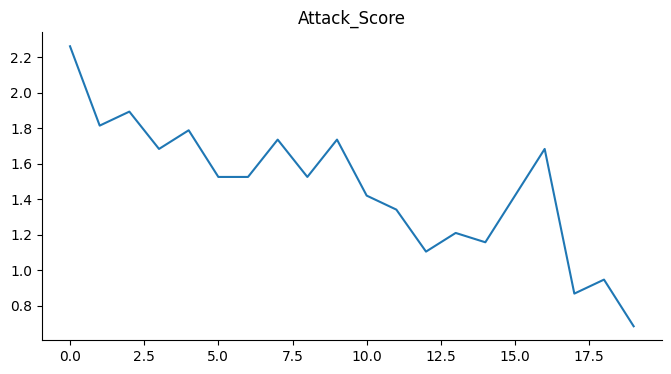

In [45]:
from matplotlib import pyplot as plt
_df_49['Attack_Score'].plot(kind='line', figsize=(8, 4), title='Attack_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

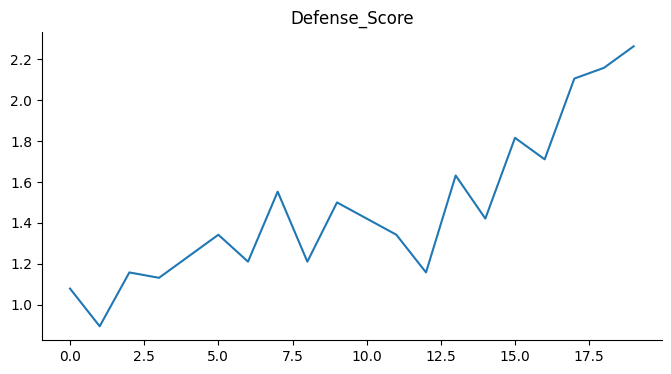

In [44]:
from matplotlib import pyplot as plt
_df_50['Defense_Score'].plot(kind='line', figsize=(8, 4), title='Defense_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

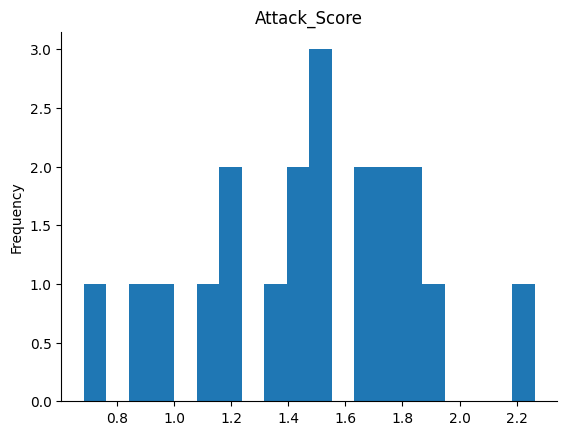

In [43]:
from matplotlib import pyplot as plt
_df_38['Attack_Score'].plot(kind='hist', bins=20, title='Attack_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

# Task
Define features and target, split data into training and testing sets, train a RandomForestClassifier model, and evaluate the model's performance using the `combined_df` DataFrame.

## Define features and target

### Subtask:
Identify the columns in the `combined_df` DataFrame that will be used as features (input to the model) and the column that will be the target (what the model will predict).


**Reasoning**:
Define the features and target variables for the machine learning model based on the available columns in the `combined_df` DataFrame.



In [53]:
features = ['Games_Played', 'Wins', 'Draws', 'Lost', 'Goals_For', 'Goals_Against', 'Goal_Difference', 'Points', 'Attack_Score', 'Defense_Score', 'Draw_Rate', 'Loss_Rate']
target = 'Team_Category'

## Split data

### Subtask:
Split the data into training and testing sets using `train_test_split` from `sklearn.model_selection`. This is crucial for evaluating the model's performance on unseen data.


**Reasoning**:
Import train_test_split and split the data into training and testing sets.



In [56]:
from sklearn.model_selection import train_test_split

X = combined_df[features]
y = combined_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,Games_Played,Wins,Draws,Lost,Goals_For,Goals_Against,Goal_Difference,Points,Attack_Score,Defense_Score,Draw_Rate,Loss_Rate
8,38,15,11,12,58,46,12,56,1.526316,1.210526,0.289474,0.315789
5,38,19,9,10,58,51,7,66,1.526316,1.342105,0.236842,0.263158
11,38,13,14,11,51,51,0,53,1.342105,1.342105,0.368421,0.289474
3,38,20,9,9,64,43,21,69,1.684211,1.131579,0.236842,0.236842
18,38,4,10,24,36,82,-46,22,0.947368,2.157895,0.263158,0.631579


,Team_Category
8,Well Balanced
5,Well Balanced
11,Strong Defense
3,Well Balanced
18,Weak Overall


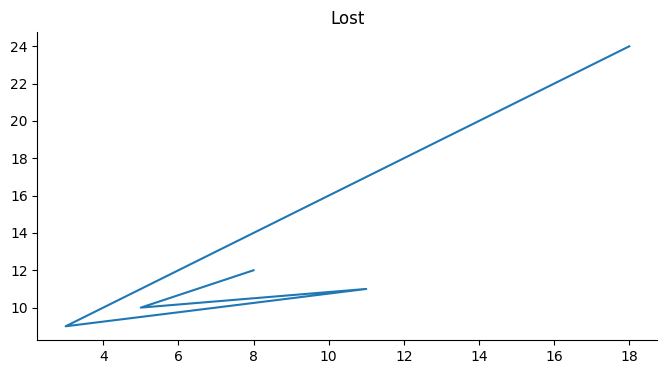

In [55]:
from matplotlib import pyplot as plt
_df_66['Lost'].plot(kind='line', figsize=(8, 4), title='Lost')
plt.gca().spines[['top', 'right']].set_visible(False)

## Train model

### Subtask:
Train the `RandomForestClassifier` model using the training data (`X_train` and `y_train`).


**Reasoning**:
Train the RandomForestClassifier model using the training data.



In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate model

### Subtask:
Make predictions on the test data (`X_test`) and evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall).


**Reasoning**:
Make predictions on the test data and evaluate the model's performance using accuracy, precision, and recall scores.



In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")

Accuracy: 1.00
Precision (weighted): 1.00
Recall (weighted): 1.00


## Summary:

### Data Analysis Key Findings

*   The model achieved perfect scores across all evaluated metrics (accuracy, precision, and recall) on the test set, indicating it can perfectly classify the test data based on the training it received.

### Insights or Next Steps

*   The perfect scores might suggest potential data leakage or overfitting. Further investigation into feature selection, data preprocessing, and cross-validation is recommended.
*   Consider evaluating the model on a completely independent dataset to confirm its real-world performance and generalizability.
